In [ ]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats

# Import the course datasets as DataFrames
diabetes = pd.read_csv("datasets/diabetes.csv")

In [ ]:
# Use this cell (and add others as needed) to predict the mpg of cars in the auto DataFrame
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split
#selecting for glucose and bmi as predictor values.
X = diabetes.drop(["diabetes","triceps","pregnancies","diastolic","insulin","dpf","age"], axis=1).values
y = diabetes["diabetes"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       ...,
       [121. ,  26.2],
       [126. ,  30.1],
       [ 93. ,  30.4]])

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# checking accuracy.
from sklearn import metrics

k_range = range(1,15)
scores = {}
scores_list = []
for k in k_range:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[83 17]
 [29 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       100
           1       0.60      0.46      0.52        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.65       154
weighted avg       0.69      0.70      0.69       154



Text(0, 0.5, 'Accuracy')

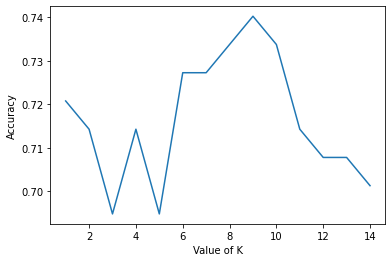

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 9)
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Print the accuracy
print(kn.score(X_test, y_test))

0.7402597402597403


Time to look at the other features: Does age and glucose give a beter prediction for diabetes?

In [ ]:
diabetes = pd.read_csv("datasets/diabetes.csv")
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
A = diabetes.drop(["pregnancies","diastolic","triceps","insulin","bmi","dpf","diabetes"],axis=1).values
b = diabetes["diabetes"].values

# split the data again
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size=0.2,random_state=42,stratify=b)

In [ ]:
# Scaling data
scaler.fit(A_train)
A_train = scaler.transform(A_train)
A_test = scaler.transform(A_test)

In [ ]:
# checking accuracy.
k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(A_train, b_train)
   y_pred = classifier.predict(A_test)
   scores[k] = metrics.accuracy_score(b_test,y_pred)
   scores_list.append(metrics.accuracy_score(b_test,y_pred))
result = metrics.confusion_matrix(b_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(b_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[81 19]
 [30 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       100
           1       0.56      0.44      0.49        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



Text(0, 0.5, 'Accuracy')

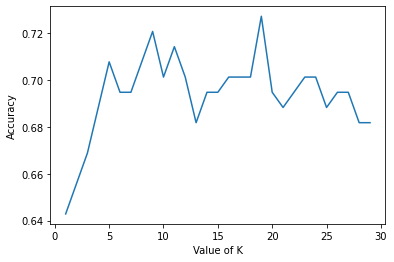

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 19)
kn.fit(A_train, b_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
# Print the accuracy
print(kn.score(A_test, b_test))

0.7272727272727273


Disclaimer: This is practice, feel free to use/edit etc. My thanks to Datacamp & tutorialspoint for explaining the concept and code.